# How do different variables correspond with the success of a movie as measured by the movie's revenue?

    Sophie Zhu
    Data Bootcamp Section 002 Fall 2019

__Variables Examined:__
- original language
- vote count 
- vote average 
- runtime
- popularity
- rating
- genre
- budget

        Data comes from MovieLens and TMDb

In [1]:
import sys                             # system module
import pandas as pd                    # data package
import matplotlib as mpl               # graphics package
import matplotlib.pyplot as plt         # pyplot module
import datetime as dt                  # date and time module
%matplotlib inline
import numpy as np
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression as reg
from sklearn.model_selection import train_test_split
from sklearn import metrics
from patsy import dmatrices
from sklearn.ensemble import RandomForestRegressor as rf
from sklearn.neighbors import KNeighborsRegressor as knn
from sklearn.model_selection import cross_val_score
import seaborn as sns
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot

In [2]:
meta = pd.read_csv('movies_metadata.csv')
meta

C:\Users\silve\Downloads\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,Sudden Death,International action superstar Jean Claude Van...,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


## Shaping and Cleaning

###### Renaming original_title column as title for merging later on

In [3]:
meta['original_title'] = meta['title']

In [4]:
meta.drop('original_title', axis=1, inplace=True)

In [5]:
meta

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,overview,popularity,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,An ugly duckling having undergone a remarkable...,6.67728,...,1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,"A mischievous young boy, Tom Sawyer, witnesses...",2.56116,...,1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,Tom and Huck,False,5.4,45.0
8,False,NaN,35000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,9091,tt0114576,en,International action superstar Jean Claude Van...,5.23158,...,1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Terror goes into overtime.,Sudden Death,False,5.5,174.0
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,James Bond must unmask the mysterious head of ...,14.686,...,1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0


###### importing more dataframes with additional information to complement the information found in meta

In [6]:
latest = pd.read_csv('movies.csv')
latest

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [7]:
ratings = pd.read_csv('ratings.csv')
ratings

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264
5,1,1590,2.5,1256677236
6,1,1591,1.5,1256677475
7,1,2134,4.5,1256677464
8,1,2478,4.0,1256677239
9,1,2840,3.0,1256677500


###### we want the rows to be unique by movieId, not userId. And, we won't use the timestamp column so we don't need it

In [8]:
ratings2 = ratings.groupby('movieId')['rating'].mean()
ratings2

movieId
1         3.886649
2         3.246583
3         3.173981
4         2.874540
5         3.077291
6         3.844211
7         3.371348
8         3.122482
9         3.007530
10        3.431633
11        3.660278
12        2.669651
13        3.339652
14        3.429000
15        2.730977
16        3.802362
17        3.950126
18        3.412070
19        2.642014
20        2.894483
21        3.568368
22        3.301140
23        3.158797
24        3.179306
25        3.666761
26        3.610139
27        3.425107
28        4.036361
29        3.918795
30        3.636664
            ...   
193823    3.000000
193825    1.000000
193827    3.000000
193829    2.000000
193833    2.500000
193835    4.500000
193837    2.000000
193839    1.500000
193841    1.500000
193843    4.000000
193845    2.000000
193849    1.750000
193851    3.500000
193853    2.000000
193855    3.500000
193857    2.000000
193859    3.000000
193861    3.000000
193863    2.000000
193864    2.500000
193866    1.000000
1938

In [9]:
full = latest.merge(ratings2, on='movieId', how='left')
full

,movieId,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.246583
2,3,Grumpier Old Men (1995),Comedy|Romance,3.173981
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.874540
4,5,Father of the Bride Part II (1995),Comedy,3.077291
5,6,Heat (1995),Action|Crime|Thriller,3.844211
6,7,Sabrina (1995),Comedy|Romance,3.371348
7,8,Tom and Huck (1995),Adventure|Children,3.122482
8,9,Sudden Death (1995),Action,3.007530
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.431633


###### reformatting the title names so that they look the same as the title names in meta

In [10]:
full['title']=full['title'].str.slice(stop=-7)

In [11]:
full

,movieId,title,genres,rating
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,2,Jumanji,Adventure|Children|Fantasy,3.246583
2,3,Grumpier Old Men,Comedy|Romance,3.173981
3,4,Waiting to Exhale,Comedy|Drama|Romance,2.874540
4,5,Father of the Bride Part II,Comedy,3.077291
5,6,Heat,Action|Crime|Thriller,3.844211
6,7,Sabrina,Comedy|Romance,3.371348
7,8,Tom and Huck,Adventure|Children,3.122482
8,9,Sudden Death,Action,3.007530
9,10,GoldenEye,Action|Adventure|Thriller,3.431633


###### merging everything together

In [12]:
two = meta.merge(full, on='title', how='inner')
two

,adult,belongs_to_collection,budget,genres_x,homepage,id,imdb_id,original_language,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,genres_y,rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,A family wedding reignites the ancient feud be...,11.7129,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,3,Comedy|Romance,3.173981
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,Comedy|Drama|Romance,2.874540
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,Comedy,3.077291
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,6,Action|Crime|Thriller,3.844211
6,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,73608,Comedy|Drama|Romance,3.675258
7,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,131274,Action|Drama|Thriller,2.200000
8,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,176577,Drama,4.000000
9,False,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,4579,tt0068688,en,"Former child star Joe Davis (Joe Dallesandro),...",0.466019,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Heat,False,6.3,6.0,6,Action|Crime|Thriller,3.844211


###### rows with a revenue of 0 are rows where the data is corrupted, so we get rid of these rows

In [13]:
two = two[two['revenue']!=0]
two

,adult,belongs_to_collection,budget,genres_x,homepage,id,imdb_id,original_language,overview,popularity,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,movieId,genres_y,rating
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,"Led by Woody, Andy's toys live happily in his ...",21.9469,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,When siblings Judy and Peter discover an encha...,17.0155,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,"Cheated on, mistreated and stepped on, the wom...",3.85949,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,4,Comedy|Drama|Romance,2.874540
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Just when George Banks has recovered from his ...,8.38752,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,5,Comedy,3.077291
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,6,Action|Crime|Thriller,3.844211
6,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,73608,Comedy|Drama|Romance,3.675258
7,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,131274,Action|Drama|Thriller,2.200000
8,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,"Obsessive master thief, Neil McCauley leads a ...",17.9249,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,176577,Drama,4.000000
19,False,NaN,2238813,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,6620,tt0047437,en,Linus and David Larrabee are the two sons of a...,7.35974,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...the chauffeur's daughter who learned her st...,Sabrina,False,7.4,284.0,7,Comedy|Romance,3.371348
20,False,NaN,2238813,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,6620,tt0047437,en,Linus and David Larrabee are the two sons of a...,7.35974,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,...the chauffeur's daughter who learned her st...,Sabrina,False,7.4,284.0,915,Comedy|Romance,3.867652


In [14]:
two.columns.values

array(['adult', 'belongs_to_collection', 'budget', 'genres_x', 'homepage',
       'id', 'imdb_id', 'original_language', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'video', 'vote_average', 'vote_count',
       'movieId', 'genres_y', 'rating'], dtype=object)

###### getting rid of columns that are irrelevant to our exploration of the data

In [15]:
two=two.drop(['adult','belongs_to_collection','homepage','overview','poster_path','status','tagline','video'], axis=1)

In [16]:
two

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,4,Comedy|Drama|Romance,2.874540
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,5,Comedy,3.077291
5,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211
6,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,73608,Comedy|Drama|Romance,3.675258
7,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,131274,Action|Drama|Thriller,2.200000
8,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.9249,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,176577,Drama,4.000000
19,2238813,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.35974,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,7,Comedy|Romance,3.371348
20,2238813,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.35974,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,915,Comedy|Romance,3.867652


In [17]:
two['popularity']=two['popularity'].astype(float)

In [18]:
two['budget']=two['budget'].astype(float)

In [19]:
two.dtypes

budget                  float64
genres_x                 object
id                       object
imdb_id                  object
original_language        object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                 float64
runtime                 float64
spoken_languages         object
title                    object
vote_average            float64
vote_count              float64
movieId                   int64
genres_y                 object
rating                  float64
dtype: object

In [20]:
two = two.drop_duplicates(subset='title', keep="first")

###### This is the dataframe we'll base all our analysis on

In [21]:
two

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,4,Comedy|Drama|Romance,2.874540
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,5,Comedy,3.077291
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211
19,2238813.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.359741,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,7,Comedy|Romance,3.371348
22,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0,9,Action,3.007530
24,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",GoldenEye,6.6,1194.0,10,Action|Adventure|Thriller,3.431633
26,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Balto,7.1,423.0,13,Adventure|Animation|Children,3.339652
27,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",10858,tt0113987,en,5.092000,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Nixon,7.1,72.0,14,Drama,3.429000


In [22]:
two.describe()

,budget,popularity,revenue,runtime,vote_average,vote_count,movieId,rating
count,5.478000e+03,5478.000000,5.478000e+03,5473.000000,5478.000000,5478.000000,5478.000000,5454.000000
mean,2.318822e+07,8.620616,6.986618e+07,107.370729,6.177839,565.645309,60278.887550,3.166971
std,3.776769e+07,12.872986,1.464302e+08,21.537752,1.025534,1111.997007,59202.710504,0.529595
min,0.000000e+00,0.000001,1.000000e+00,0.000000,0.000000,0.000000,1.000000,0.500000
25%,0.000000e+00,3.927855,2.435244e+06,94.000000,5.700000,40.000000,4198.250000,2.856786
50%,8.000000e+06,7.503388,1.683423e+07,104.000000,6.200000,161.000000,48195.000000,3.230000
75%,3.000000e+07,11.016481,6.959471e+07,117.000000,6.800000,561.750000,110437.250000,3.544034
max,3.800000e+08,547.488298,2.787965e+09,338.000000,10.000000,14075.000000,193269.000000,5.000000


## What is the relationship between the original language of a movie and the success of the movie?

Our prediction would be that English movies perform best, as they seem to have the greatest international recognition. Bollywood and Chinese movies would likely also perform well, as these languages have large viewership in their home countries, both of which have large populations.

###### The languages in our dataframe

In [23]:
two['original_language'].unique()

array(['en', 'ru', 'sv', 'zh', 'de', 'ja', 'fr', 'it', 'da', 'ko', 'cn',
       'pt', 'es', 'pl', 'fa', 'hi', 'tr', 'bm', 'af', 'vi', 'ro', 'fi',
       'id', 'sr', 'nl', 'ar', 'ta', 'ml', 'he', 'ka', 'no', 'kn', 'th',
       'is', 'te', 'hu', 'ur'], dtype=object)

In [24]:
two.groupby('original_language')[['revenue']].mean().sort_values('revenue',ascending=False)

,revenue
original_language,
zh,9.245789e+07
en,7.633199e+07
te,4.861036e+07
ja,2.887055e+07
cn,2.848003e+07
tr,2.367011e+07
hi,2.332991e+07
ko,2.095528e+07
it,1.638730e+07


In [25]:
plt.style.use('ggplot')

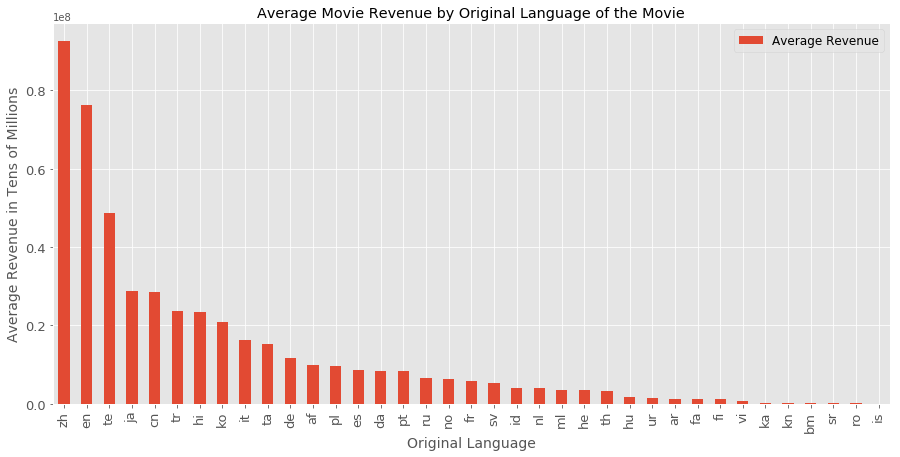

In [26]:
fig,ax = plt.subplots()
two.groupby('original_language')[['revenue']].mean().sort_values('revenue',ascending=False).plot.bar(
    ax=ax, figsize=(15,7), title='Average Movie Revenue by Original Language of the Movie')
ax.set_xlabel('Original Language', size=14)
ax.set_ylabel('Average Revenue in Tens of Millions', size=14)
ax.legend(['Average Revenue'], fontsize=12)
ax.tick_params(axis='both',labelsize=13)

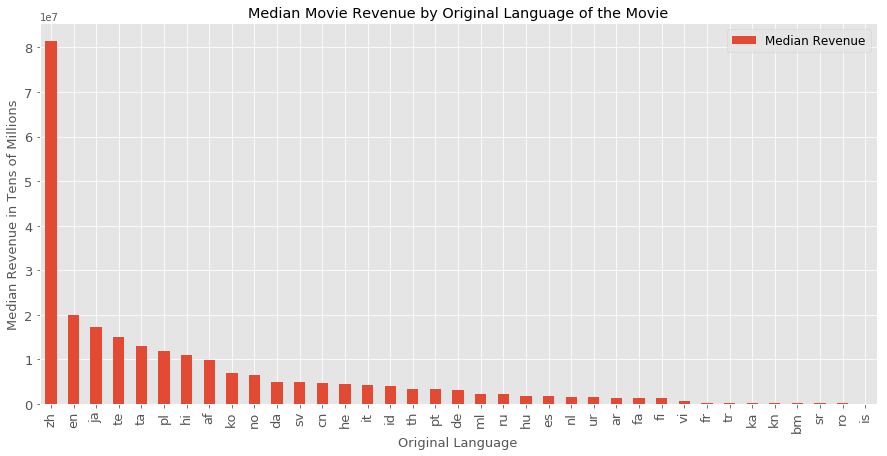

In [27]:
fig,ax = plt.subplots()
two.groupby('original_language')[['revenue']].median().sort_values('revenue',ascending=False).plot.bar(
    ax=ax, figsize=(15,7), title='Median Movie Revenue by Original Language of the Movie')
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Median Revenue in Tens of Millions', size=13)
ax.legend(['Median Revenue'], fontsize=12)
ax.tick_params(axis='both',labelsize=13)

Median revenue for Chinese (zh) movies is significantly greater than median revenue for movies in other languages, even though average revenue for the top three languages aren't so different. This implies that in general, Chinese movies tend to consistently make greater revenue than movies in other languages. In contrast, the high average revenues of movies in other langauges are likely due to a few outliers that skew the average. 

It makes sense that several Indian languages, such as Tegulu (te), Tamil (ta), and Hindi (hi) would be towards the top in revenue, since Bollywood is an extremely successful and large market. However, it is surprising that Japanese (ja) movies have such high revenue, as most people in the US and Europe presumably know very little about the Japanese film industry.

###### Examining Only Movies with Revenues Greater Than 100,000,000

In [28]:
top_rev = two.loc[two['revenue']>100000000]
top_rev

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1.874368e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211
24,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",GoldenEye,6.6,1194.0,10,Action|Adventure|Thriller,3.431633
29,52000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",524,tt0112641,en,10.137389,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,1.161124e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Casino,7.8,1343.0,16,Crime|Drama,3.802362
30,16500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",4584,tt0114388,en,10.673167,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-12-13,1.350000e+08,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sense and Sensibility,7.2,364.0,17,Drama|Romance,3.950126
43,30000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",9273,tt0112281,en,8.205448,"[{'name': 'O Entertainment', 'id': 5682}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-11-10,2.123855e+08,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Ace Ventura: When Nature Calls,6.1,1128.0,19,Comedy,2.642014
45,30250000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",8012,tt0113161,en,12.669608,"[{'name': 'Jersey Films', 'id': 216}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-20,1.151016e+08,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Get Shorty,6.4,305.0,21,Comedy|Crime|Thriller,3.568368
72,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",9909,tt0112792,en,9.481338,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-08-11,1.800000e+08,99.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Dangerous Minds,6.4,249.0,31,Drama,3.237587
74,30000000.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",9598,tt0112431,en,14.404764,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'AU', 'name': 'Australia'}, {'...",1995-07-18,2.541349e+08,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Babe,6.0,756.0,34,Children|Drama,3.613834


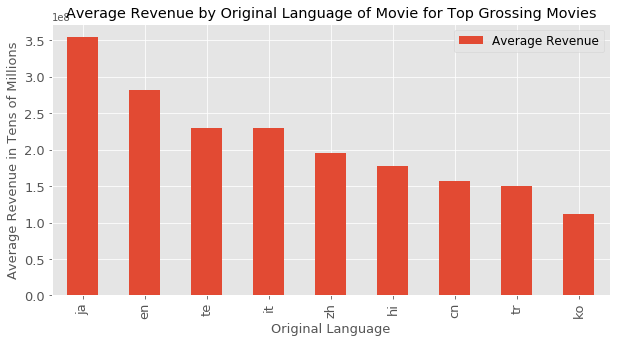

In [29]:
fig,ax = plt.subplots()
top_rev.groupby('original_language')[['revenue']].mean().sort_values('revenue',ascending=False).plot.bar(
    ax=ax, figsize=(10,5), title='Average Revenue by Original Language of Movie for Top Grossing Movies')
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Average Revenue in Tens of Millions', size=13)
ax.legend(['Average Revenue'], fontsize=12)
ax.tick_params(axis='both',labelsize=13)

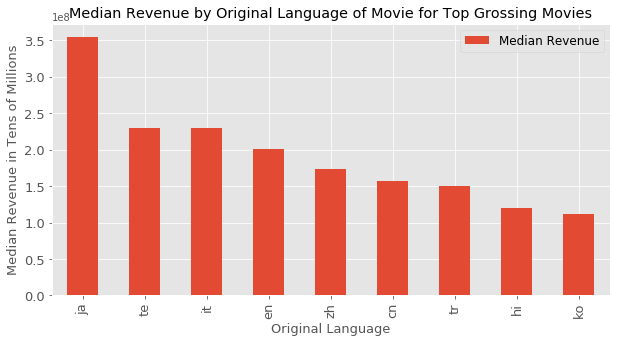

In [30]:
fig,ax = plt.subplots()
top_rev.groupby('original_language')[['revenue']].median().sort_values('revenue',ascending=False).plot.bar(
    ax=ax, figsize=(10,5), title='Median Revenue by Original Language of Movie for Top Grossing Movies')
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Median Revenue in Tens of Millions', size=13)
ax.legend(['Median Revenue'], fontsize=12)
ax.tick_params(axis='both',labelsize=13)

Surprisingly, out of the movies with top revenues, the average and median revenue for Japanese movies is higher than the revenue for English movies.

When examining median revenue for only top grossing movies, revenue for English movies falls to 4th place, indicating that there are probably a few English movies with extremely high revenues that are skewing the data and pulling up the average revenue for English movies. The similarity in average and median revenues for movies in Tegulu and Italian movies indicates that the revenues for movies in these two languages are relatively consistent

Chinese movies place low for both average and median revenue, indicating that though Chinese movies may consistently make high revenues, very few make exceptionally high revenues and therefore most Chinese movies were not included in the dataframe of top-grossing movies.

###### finding which Japanese movies contribute to its high median and average revenue

In [31]:
top_rev.loc[top_rev['original_language']=='ja']

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating
37302,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 16, ...",372058,tt5311514,ja,34.461252,"[{'name': 'CoMix Wave Films', 'id': 10198}]","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2016-08-26,355298270.0,106.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Your Name.,8.5,1030.0,163134,Animation|Drama|Fantasy|Romance,4.124481


As it turns out, there is only one Japanese movie with a revenue greater than 100 million: "Your Name". Because there are no other Japanese movies to balance out the average and median revenue, this singular outlier is likely why Japanese unexpectedly seemed to have the highest revenues.

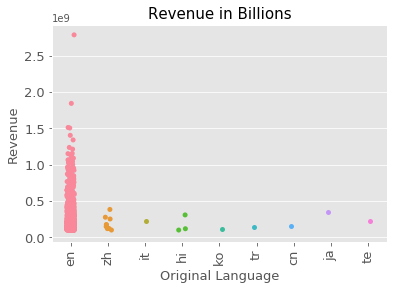

In [32]:
fig,ax=plt.subplots()
x = sns.stripplot(x ='original_language', y = "revenue", data = top_rev, jitter = True, ax=ax)
plt.xticks(rotation = 90)
plt.title("Revenue in Billions", fontsize = 15)
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Revenue', size=13)
ax.tick_params(axis='both', labelsize=13)
plt.show()

Most languages only have one movie with revenue over 100 million. The greater quantity of English movies with high revenues is likely indicative of the popularity of English movies worldwide. The revenues for Chinese and Hindi movies seem relatively similar compared to the revenue for English movies. While revenue for English movies, like other languages, are clustered towards the lower end towards $100 million, there is one outlier that made significantly more revenue than all other English movies.

###### finding the movie with the highest revenue

In [33]:
new_top_rev=top_rev.set_index('title')

In [34]:
new_top_rev['revenue'].idxmax()

'Avatar'

Because this data is from 2017, this outlier turns out to be Avatar. However, if more recent data was available, Avengers Endgame would be slightly above Avatar in revenue, also an outlier compared to most English-language movies. Endgame would likely pull up average revenue significantly, but median revenue would not be so affected.

###### Finding Most Common Original Movie Languages

In [35]:
two.groupby('original_language')['movieId'].count().sort_values(ascending=False)

original_language
en    4878
hi     102
fr      91
ru      90
ja      49
es      45
ko      30
ta      26
it      23
zh      23
de      22
cn      15
ml      11
te       8
da       8
sv       7
tr       7
pt       6
nl       5
pl       4
ro       4
he       3
bm       2
no       2
sr       2
ur       2
fi       2
fa       2
ar       1
ka       1
hu       1
id       1
is       1
vi       1
kn       1
th       1
af       1
Name: movieId, dtype: int64

###### creating a dataframe of only movies in languages that are in more than 50 rows of this dataframe

In [36]:
gtoh = ['en','fr','ru','hi']

In [37]:
gtoh_df = two.loc[two['original_language'].isin(gtoh)]
gtoh_df

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,4,Comedy|Drama|Romance,2.874540
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,5,Comedy,3.077291
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211
19,2238813.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.359741,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,7,Comedy|Romance,3.371348
22,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0,9,Action,3.007530
24,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",GoldenEye,6.6,1194.0,10,Action|Adventure|Thriller,3.431633
26,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Balto,7.1,423.0,13,Adventure|Animation|Children,3.339652
27,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",10858,tt0113987,en,5.092000,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Nixon,7.1,72.0,14,Drama,3.429000


###### What Does Revenue Look Like for the Most Common Movie Languages?

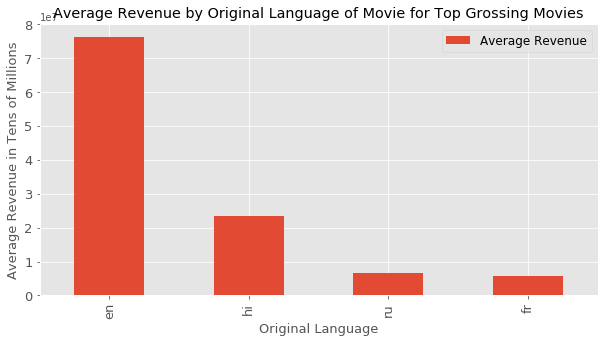

In [38]:
fig,ax = plt.subplots()
gtoh_df.groupby('original_language')[['revenue']].mean().sort_values('revenue',ascending=False).plot.bar(
    ax=ax, figsize=(10,5), title='Average Revenue by Original Language of Movie for Top Grossing Movies')
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Average Revenue in Tens of Millions', size=13)
ax.legend(['Average Revenue'], fontsize=12)
ax.tick_params(axis='both',labelsize=13)

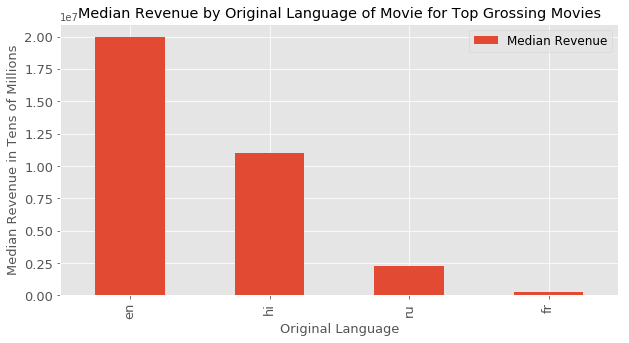

In [39]:
fig,ax = plt.subplots()
gtoh_df.groupby('original_language')[['revenue']].median().sort_values('revenue',ascending=False).plot.bar(
    ax=ax, figsize=(10,5), title='Median Revenue by Original Language of Movie for Top Grossing Movies')
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Median Revenue in Tens of Millions', size=13)
ax.legend(['Median Revenue'], fontsize=12)
ax.tick_params(axis='both',labelsize=13)

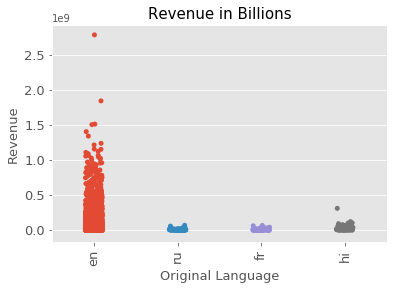

In [40]:
fig,ax=plt.subplots()
x = sns.stripplot(x ='original_language', y = "revenue", data = gtoh_df, jitter = True, ax=ax)
plt.xticks(rotation = 90)
plt.title("Revenue in Billions", fontsize = 15)
ax.set_xlabel('Original Language', size=13)
ax.set_ylabel('Revenue', size=13)
ax.tick_params(axis='both', labelsize=13)
plt.show()

Unlike English movies, the revenue for other commonly-used movie languages is much more regular. This is likely due to the sheer quantity of English movies compared to other movies 

###### creating a correlation heatmap to see which numerical variables may be interesting to explore

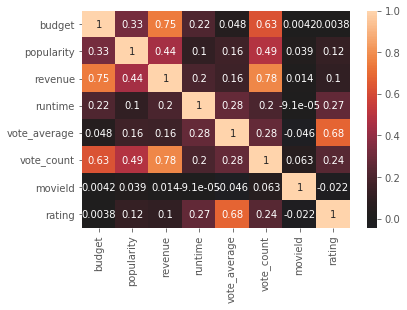

In [41]:
sns.heatmap(two.corr(),center=0,annot=True)

## Exploring the relationship between vote count and revenue

###### creating a new dataframe so that the original dataframe isn't changed

In [42]:
vc=two

In [43]:
reg1=smf.ols('revenue ~ vote_count', data=vc).fit()

In [44]:
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     8256.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:36:47   Log-Likelihood:            -1.0825e+05
No. Observations:                5478   AIC:                         2.165e+05
Df Residuals:                    5476   BIC:                         2.165e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.211e+07    1.4e+06      8.639      0.0

The high r-squared value of .601 shows that vote count can explain a large portion of the variation in movie revenues.

In [45]:
vc['yhat1']=reg1.predict()

C:\Users\silve\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


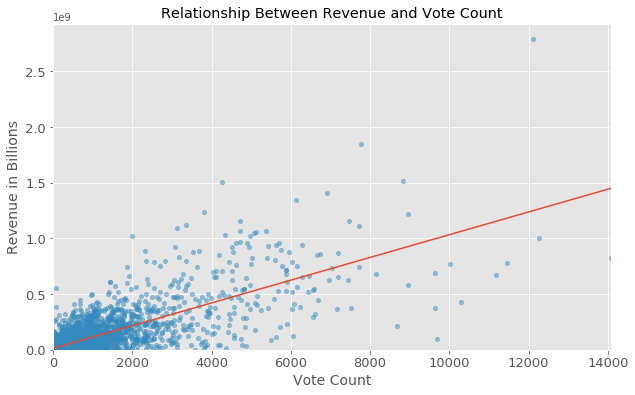

In [46]:
fig,ax = plt.subplots()
vc.plot.scatter(
    x='vote_count',y='revenue', title='Relationship Between Revenue and Vote Count', figsize=(10,6), ax=ax, alpha=.5)
vc.sort_values('vote_count').set_index('vote_count')['yhat1'].plot(ax=ax)
ax.set_xlabel('Vote Count', size=14)
ax.set_ylabel('Revenue in Billions', size=14)
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.tick_params(axis='both',labelsize=13)

###### examining voting tendencies for users

Text(0, 0.5, 'Count')

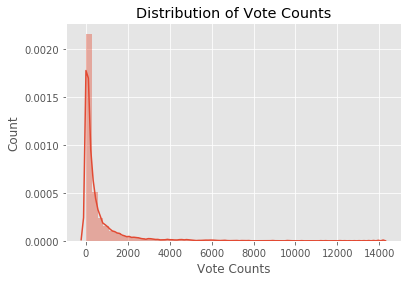

In [47]:
fig,ax = plt.subplots()
sns.distplot(two.vote_count)
ax.set_title('Distribution of Vote Counts')
ax.set_xlabel('Vote Counts')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

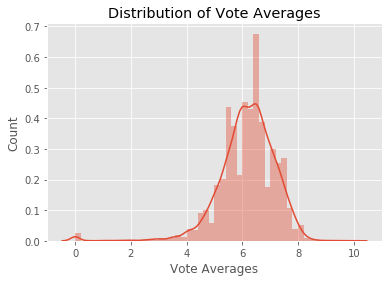

In [48]:
fig,ax = plt.subplots()
sns.distplot(two.vote_average)
ax.set_title('Distribution of Vote Averages')
ax.set_xlabel('Vote Averages')
ax.set_ylabel('Count')

Clearly, the large majority of movies have very few votes. This is likely because most movies are so mediocre that they do not warrant the particularly passionate opinions necessary for a viewer to put in the effort to vote for a film. However, when people do decide to vote, most votes are between 5 and 8. This indicates that more often than not, people generally vote when they like, rather than dislike, a movie. While it often seems as though people are more vocal about movies they dislike strongly than movies they like, this data shows that positive feelings towards a movie drive people to vote for a movie more so than negative feelings.

## Examining the Relationship between Runtime and a Movie's Success

In [49]:
run = two.dropna()

In [50]:
reg2=smf.ols('revenue ~ runtime', data=run).fit()

In [51]:
print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     223.8
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           1.28e-49
Time:                        18:36:48   Log-Likelihood:            -1.1007e+05
No. Observations:                5448   AIC:                         2.201e+05
Df Residuals:                    5446   BIC:                         2.201e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -7.524e+07   9.91e+06     -7.596      0.0

In [52]:
run['yhat2']=reg2.predict()

C:\Users\silve\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


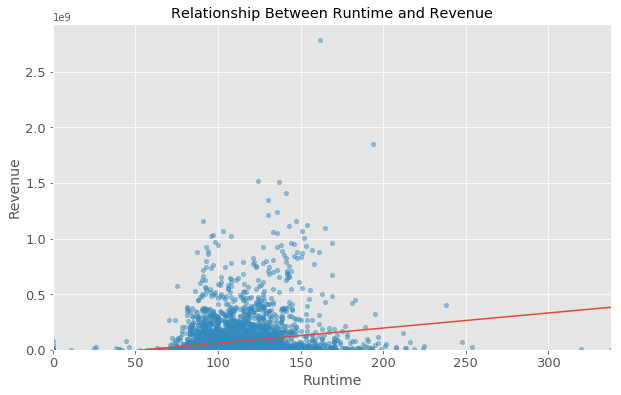

In [53]:
fig,ax = plt.subplots()
run.plot.scatter(
    x='runtime',y='revenue', title='Relationship Between Runtime and Revenue', figsize=(10,6), ax=ax, alpha=.5)
run.sort_values('runtime').set_index('runtime')['yhat2'].plot(ax=ax)
ax.set_xlabel('Runtime', size=14)
ax.set_ylabel('Revenue', size=14)
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.tick_params(axis='both',labelsize=13)

With such a low r-squared value and a nearly horizontal regression line, it is clear that the runtime of a movie has little to do with a movie's success. While we might think that viewers would turn away from exhaustively long runtimes or very short runtimes, this data shows otherwise. Runtime has little relationship with whether a person decides to watch a movie at the theatre.

## Exploring the Relationship between Popularity and Revenue

In [54]:
pop = two

In [55]:
reg3=smf.ols('revenue ~ popularity', data=pop).fit()

In [56]:
print(reg3.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1349.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):          3.12e-264
Time:                        18:36:48   Log-Likelihood:            -1.1017e+05
No. Observations:                5478   AIC:                         2.203e+05
Df Residuals:                    5476   BIC:                         2.204e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.627e+07   2.13e+06     12.315      0.0

In [57]:
pop['yhat3'] = reg3.predict()

C:\Users\silve\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


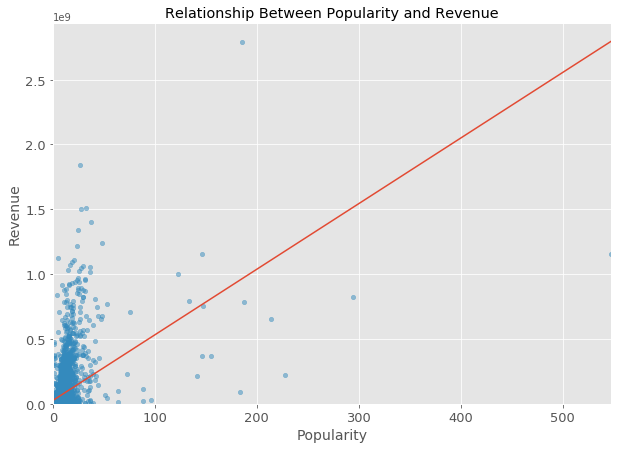

In [58]:
fig,ax = plt.subplots()
pop.plot.scatter(
    x='popularity',y='revenue', title='Relationship Between Popularity and Revenue', figsize=(10,7), ax=ax, alpha=.5)
pop.sort_values('popularity').set_index('popularity')['yhat3'].plot(ax=ax)
ax.set_xlabel('Popularity', size=14)
ax.set_ylabel('Revenue', size=14)
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.tick_params(axis='both',labelsize=13)

While the regression line mostly reinforces what most people would probably predict, namely that more popular movies have greater revenues, in the scatterplot itself, it is interesting that towards the low end of popularity, there are movies with a wide range of revenues. The relatively low r-squared value of .198 provides evidence of this unexpected lack of a strong relationship between popularity and revenue.

## Exploring the Relationship Between Rating and Revenue

In [59]:
rate = two
rate

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating,yhat1,yhat3
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649,5.650125e+08,1.372629e+08
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583,2.584915e+08,1.123228e+08
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,4,Comedy|Drama|Romance,2.874540,1.558221e+07,4.578723e+07
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,5,Comedy,3.077291,2.977489e+07,6.868731e+07
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211,2.046818e+08,1.169219e+08
19,2238813.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.359741,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,7,Comedy|Romance,3.371348,4.110861e+07,6.348941e+07
22,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0,9,Action,3.007530,2.987699e+07,5.272643e+07
24,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",GoldenEye,6.6,1194.0,10,Action|Adventure|Thriller,3.431633,1.340247e+08,1.005415e+08
26,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Balto,7.1,423.0,13,Adventure|Animation|Children,3.339652,5.530129e+07,8.766885e+07
27,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",10858,tt0113987,en,5.092000,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Nixon,7.1,72.0,14,Drama,3.429000,1.946222e+07,5.202051e+07


In [60]:
cal = ['rating','revenue']
rate.dropna(subset=cal,how='any',inplace=True)

C:\Users\silve\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0, 0.5, 'Count')

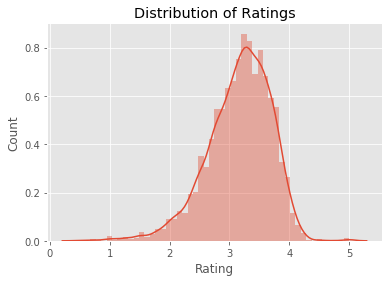

In [61]:
fig,ax = plt.subplots()
sns.distplot(rate.rating)
ax.set_title('Distribution of Ratings')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

The slight bias of ratings towards the positive end is reflective of the distribution of vote averages examined earlier. Both demonstrate that in general, people are more inclined to evaluate movies then enjoy, rather than dislike.

###### Creating a dataframe of just movies with ratings between 3 and 4

In [62]:
tf = rate.loc[((rate['rating'])>=3)&((rate['rating'])<=4)]
tf  

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating,yhat1,yhat3
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,3.735540e+08,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649,5.650125e+08,1.372629e+08
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,2.627972e+08,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583,2.584915e+08,1.123228e+08
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,7.657891e+07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,5,Comedy,3.077291,2.977489e+07,6.868731e+07
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,1.874368e+08,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211,2.046818e+08,1.169219e+08
19,2238813.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.359741,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,1.000000e+07,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,7,Comedy|Romance,3.371348,4.110861e+07,6.348941e+07
22,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,6.435017e+07,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0,9,Action,3.007530,2.987699e+07,5.272643e+07
24,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,3.521940e+08,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",GoldenEye,6.6,1194.0,10,Action|Adventure|Thriller,3.431633,1.340247e+08,1.005415e+08
26,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,1.134832e+07,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Balto,7.1,423.0,13,Adventure|Animation|Children,3.339652,5.530129e+07,8.766885e+07
27,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",10858,tt0113987,en,5.092000,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,1.368176e+07,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Nixon,7.1,72.0,14,Drama,3.429000,1.946222e+07,5.202051e+07
29,52000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",524,tt0112641,en,10.137389,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",1995-11-22,1.161124e+08,178.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Casino,7.8,1343.0,16,Crime|Drama,3.802362,1.492385e+08,7.753712e+07


###### Calculating the proportion of total revenue accounted for by revenue from movies with a rating between 3 and 4

In [63]:
per = sum(tf['revenue'])/sum(rate['revenue'])*100
print(per,"%")

72.38621698642083 %


This reaffirms that most movies have ratings between 3 and 4, and by extension, most movie revenue is accounted for by revenue from movies with ratings between 3 and 4 as well.

###### Divide the rating data ino five levels: very low, low, medium, moderately high, high

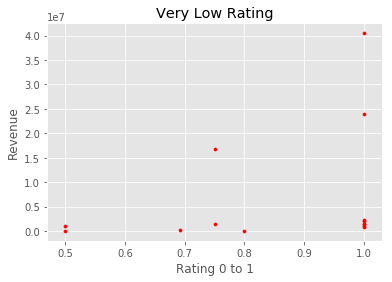

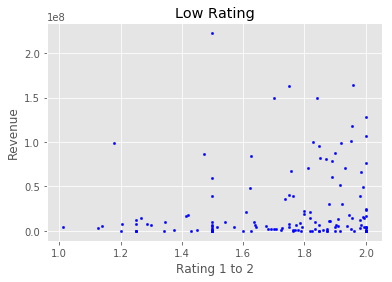

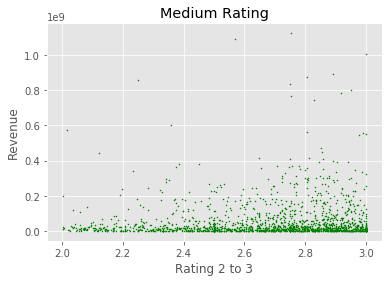

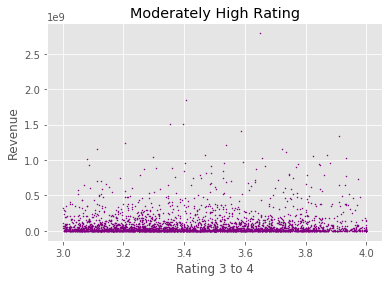

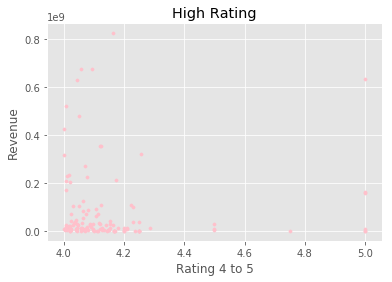

In [64]:
vl = rate.loc[(rate['rating']) <= 1]
l = rate.loc[(rate['rating'] > 1 ) & (rate['rating'] <= 2 ) ]
m = rate.loc[(rate['rating'] > 2 ) & (rate['rating'] <= 3 ) ]
mh = rate.loc[(rate['rating'] > 3 ) & (rate['rating'] <= 4 ) ]
h = rate.loc[(rate['rating'] > 4 ) & (rate['rating'] <= 5 ) ]


#1
fig = plt.figure()
axes = fig.subplots() 
x = vl.rating 
y = vl.revenue   
plt.scatter(x, y, color= "red",s=10) 
plt.xlabel('Rating 0 to 1') 
plt.ylabel('Revenue')  
plt.title('Very Low Rating')    
plt.show() 

#2
fig = plt.figure()
axes = fig.subplots() 
x = l.rating 
y = l.revenue  
plt.scatter(x, y, color= "blue",s=5) 
plt.xlabel('Rating 1 to 2') 
plt.ylabel('Revenue') 
plt.title('Low Rating')    
plt.show() 

#3
fig = plt.figure()
axes = fig.subplots() 
x = m.rating 
y = m.revenue  
plt.scatter(x, y, color= "green",s=1) 
plt.xlabel('Rating 2 to 3') 
plt.ylabel('Revenue') 
plt.title('Medium Rating')    
plt.show() 

#4
fig = plt.figure()
axes = fig.subplots() 
x = mh.rating 
y = mh.revenue  
plt.scatter(x, y, color= "purple",s=1) 
plt.xlabel('Rating 3 to 4') 
plt.ylabel('Revenue') 
plt.title('Moderately High Rating')    
plt.show() 

#5

fig = plt.figure()
axes = fig.subplots() 
x = h.rating 
y = h.revenue  
plt.scatter(x, y, color= "pink",s=10) 
plt.xlabel('Rating 4 to 5') 
plt.ylabel('Revenue') 
plt.title('High Rating')    
plt.show() 

It appears that ratings above 4.4 are about as rare as ratings below 1. In general, ratings are more spread out in the lower end and more clustered in the high end, demonstrating that negative opinions regarding movies is more subjective, while positive appraisals of a movie are more agreed upon.

In [65]:
reg4 = smf.ols('revenue ~ rating',data = rate).fit()

In [66]:
reg4.rsquared

0.010946582788683545

In [67]:
print(reg4.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     60.34
Date:                Thu, 19 Dec 2019   Prob (F-statistic):           9.46e-15
Time:                        18:36:50   Log-Likelihood:            -1.1026e+05
No. Observations:                5454   AIC:                         2.205e+05
Df Residuals:                    5452   BIC:                         2.205e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.181e+07    1.2e+07     -1.820      0.0

While most people expect ratings and revenue to be reflective of each other, surprisingly, r-squared is only 0.011, which means that ratings as a variable serves as a poor explanation of variations in revenue.

## Seeing the Most Produced Movie Genres

In [68]:
srt = rate.sort_values(['revenue'],ascending=False)
srt

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating,yhat1,yhat3
15789,237000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",19995,tt0499549,en,185.070892,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Avatar,7.2,12114.0,72998,Action|Adventure|Sci-Fi|IMAX,3.649251,1.249018e+09,9.622478e+08
2548,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,tt0120338,en,26.889070,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1.845034e+09,194.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Titanic,7.5,7770.0,1721,Drama|Romance,3.405709,8.054712e+08,1.622573e+08
23245,150000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",135397,tt0369610,en,32.790475,"[{'name': 'Universal Studios', 'id': 13}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-09,1.513529e+09,124.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Jurassic World,6.5,8842.0,117529,Action|Adventure|Drama|Sci-Fi|Thriller,3.352754,9.149284e+08,1.921031e+08
26838,190000000.0,"[{'id': 28, 'name': 'Action'}]",168259,tt2820852,en,27.275687,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",2015-04-01,1.506249e+09,137.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Furious 7,7.3,4253.0,130634,Action|Crime|Thriller,3.396226,4.463658e+08,1.642125e+08
24729,280000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",99861,tt2395427,en,37.379420,"[{'name': 'Marvel Studios', 'id': 420}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-04-22,1.405404e+09,141.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Avengers: Age of Ultron,7.3,6908.0,122892,Action|Adventure|Sci-Fi,3.588187,7.174562e+08,2.153113e+08
18033,125000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 14, '...",12445,tt1201607,en,24.990737,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2011-07-07,1.342000e+09,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Harry Potter and the Deathly Hallows: Part 2,7.9,6141.0,88125,Action|Adventure|Drama|Fantasy|Mystery|IMAX,3.911401,6.391412e+08,1.526566e+08
39978,250000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",337339,tt4630562,en,48.573287,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2017-04-12,1.238765e+09,136.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Fate of the Furious,6.8,3803.0,170875,Action|Crime|Drama|Thriller,3.203552,4.004182e+08,2.719233e+08
20356,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",68721,tt1300854,en,23.721243,"[{'name': 'Marvel Studios', 'id': 420}]","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2013-04-18,1.215440e+09,130.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Iron Man 3,6.8,8951.0,102125,Action|Sci-Fi|Thriller|IMAX,3.536996,9.260579e+08,1.462363e+08
28584,74000000.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",211672,tt2293640,en,547.488298,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2015-06-17,1.156731e+09,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Minions,6.4,4729.0,135887,Adventure|Animation|Children|Comedy,3.111522,4.949680e+08,2.795142e+09
24736,250000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",271110,tt3498820,en,145.882135,"[{'name': 'Studio Babelsberg', 'id': 264}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-04-27,1.153304e+09,147.0,"[{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...",Captain America: Civil War,7.1,7462.0,122920,Action|Sci-Fi|Thriller,3.723544,7.740227e+08,7.640541e+08


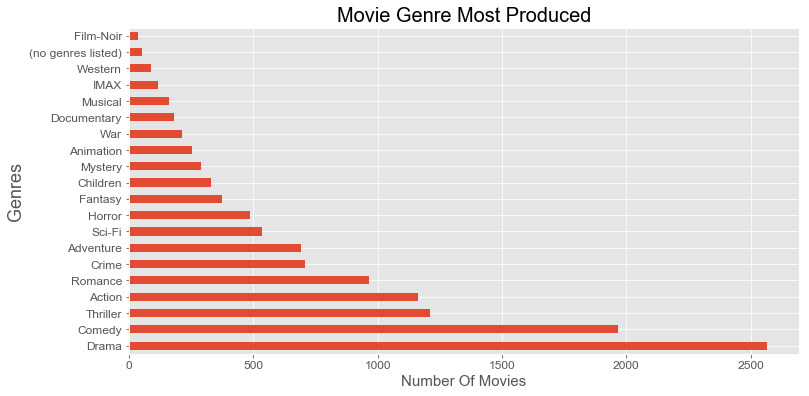

In [69]:
def count_genre(x):
    data_plot = srt[x].str.cat(sep = '|')
    data = pd.Series(data_plot.split('|'))
    info = data.value_counts(ascending=False)
    return info

total_genre_movies = count_genre('genres_y')

total_genre_movies.plot(kind= 'barh',figsize = (12,6),fontsize=12)

plt.title("Movie Genre Most Produced",fontsize=20)
plt.xlabel('Number Of Movies',fontsize=15)
plt.ylabel("Genres",fontsize= 18)
sns.set_style("whitegrid")

In [70]:
rate.loc[rate['genres_y']=='Sci-Fi',['title','budget']]

,title,budget
4529,Mission to Mars,90000000.0
5520,Battle Beyond the Stars,2000000.0
7623,Invaders from Mars,12000000.0
8823,Things to Come,2100000.0
9520,Not of This Earth,210000.0
15721,Sleep Dealer,2500000.0
22207,Dawn of the Planet of the Apes,170000000.0
23492,Hard to Be a God,7000000.0
25928,Z for Zachariah,0.0
27323,Parts Per Billion,500000.0


In [71]:
two.loc[two['genres_y']=='Drama',['title','budget']].sort_values('budget', ascending=False).describe()

,budget
count,6.360000e+02
mean,9.453097e+06
std,1.610209e+07
min,0.000000e+00
25%,0.000000e+00
50%,2.000000e+06
75%,1.300000e+07
max,1.500000e+08


In [72]:
two['budget'].describe()

count    5.454000e+03
mean     2.316994e+07
std      3.769930e+07
min      0.000000e+00
25%      0.000000e+00
50%      8.000000e+06
75%      3.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

With the recent popularity of recent Marvel films, we may expect sci-fi movies to be higher up on the list of most produced genres. Though we may assume that sci-fi films are rare because they are expensive to make, it appears that budget cannot explain the lack of sci-fi movies. Rather, what is more likely is that most movies categorized as "sci-fi" are also categorized as action movies, and therefore are accounted for under the bar for "action".

Perhaps unexpectedly, "drama" proves to be the most popular genre. After all, many of the movies that have recently made headlines would not be considered primarily as "drama" movies. This could reflect Hollywood's flair for movies that exaggerate reality. Or perhaps, drama movies are cheaper to produce and therefore there are many indie films in the category of "drama". The difference in mean budget for all movies and just drama movies seems to suggest this

In [73]:
budge = two

In [74]:
budge

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating,yhat1,yhat3
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,tt0114709,en,21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Toy Story,7.7,5415.0,1,Adventure|Animation|Children|Comedy|Fantasy,3.886649,5.650125e+08,1.372629e+08
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,tt0113497,en,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Jumanji,6.9,2413.0,2,Adventure|Children|Fantasy,3.246583,2.584915e+08,1.123228e+08
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,tt0114885,en,3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Waiting to Exhale,6.1,34.0,4,Comedy|Drama|Romance,2.874540,1.558221e+07,4.578723e+07
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,tt0113041,en,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Father of the Bride Part II,5.7,173.0,5,Comedy,3.077291,2.977489e+07,6.868731e+07
5,60000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",949,tt0113277,en,17.924927,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Heat,7.7,1886.0,6,Action|Crime|Thriller,3.844211,2.046818e+08,1.169219e+08
19,2238813.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",6620,tt0047437,en,7.359741,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1954-09-28,10000000.0,113.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Sabrina,7.4,284.0,7,Comedy|Romance,3.371348,4.110861e+07,6.348941e+07
22,35000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",9091,tt0114576,en,5.231580,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,64350171.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Sudden Death,5.5,174.0,9,Action,3.007530,2.987699e+07,5.272643e+07
24,58000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",710,tt0113189,en,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",GoldenEye,6.6,1194.0,10,Action|Adventure|Thriller,3.431633,1.340247e+08,1.005415e+08
26,0.0,"[{'id': 10751, 'name': 'Family'}, {'id': 16, '...",21032,tt0112453,en,12.140733,"[{'name': 'Universal Pictures', 'id': 33}, {'n...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,11348324.0,78.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Balto,7.1,423.0,13,Adventure|Animation|Children,3.339652,5.530129e+07,8.766885e+07
27,44000000.0,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",10858,tt0113987,en,5.092000,"[{'name': 'Hollywood Pictures', 'id': 915}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,13681765.0,192.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Nixon,7.1,72.0,14,Drama,3.429000,1.946222e+07,5.202051e+07


In [75]:
reg5=smf.ols('revenue ~ budget', data=budge).fit()

In [76]:
print(reg5.summary())

                            OLS Regression Results                            
Dep. Variable:                revenue   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     7028.
Date:                Thu, 19 Dec 2019   Prob (F-statistic):               0.00
Time:                        18:36:50   Log-Likelihood:            -1.0804e+05
No. Observations:                5454   AIC:                         2.161e+05
Df Residuals:                    5452   BIC:                         2.161e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.316e+06   1.54e+06      1.503      0.1

In [77]:
budge['yhat5']=reg5.predict()

C:\Users\silve\Downloads\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


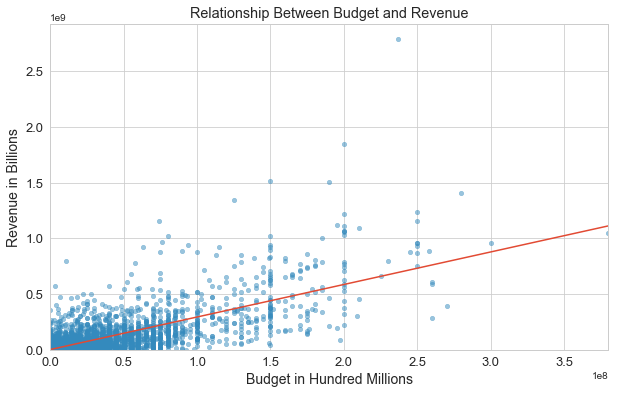

In [78]:
fig,ax = plt.subplots()
budge.plot.scatter(
    x='budget', y='revenue', title='Relationship Between Budget and Revenue', figsize=(10,6), ax=ax, alpha=.5)
budge.sort_values('budget').set_index('budget')['yhat5'].plot(ax=ax)
ax.set_xlabel('Budget in Hundred Millions', size=14)
ax.set_ylabel('Revenue in Billions', size=14)
ax.set_ylim(0,)
ax.set_xlim(0,)
ax.tick_params(axis='both',labelsize=13)

From this graph, it is clear that there were many movies that shared the same budget, but achieved varying revenues. Thus, budget must not be the only affector of revenue. However, with a high r-squared value of .563, budget certainly accounts for a sizeable proportion of the variation in revenue.

In [79]:
opf = budge.loc[budge['budget']==200000000]
opf.sort_values('revenue', ascending=False)

,budget,genres_x,id,imdb_id,original_language,popularity,production_companies,production_countries,release_date,revenue,...,spoken_languages,title,vote_average,vote_count,movieId,genres_y,rating,yhat1,yhat3,yhat5
2548,200000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",597,tt0120338,en,26.889070,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1997-11-18,1.845034e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Titanic,7.5,7770.0,1721,Drama|Romance,3.405709,8.054712e+08,1.622573e+08,5.863041e+08
20356,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",68721,tt1300854,en,23.721243,"[{'name': 'Marvel Studios', 'id': 420}]","[{'iso_3166_1': 'CN', 'name': 'China'}, {'iso_...",2013-04-18,1.215440e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Iron Man 3,6.8,8951.0,102125,Action|Sci-Fi|Thriller|IMAX,3.536996,9.260579e+08,1.462363e+08,5.863041e+08
19380,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",37724,tt1074638,en,20.309585,"[{'name': 'Columbia Pictures', 'id': 5}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2012-10-25,1.108561e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Skyfall,6.9,7718.0,96079,Action|Adventure|Thriller|IMAX,3.734522,8.001617e+08,1.289821e+08,5.863041e+08
16426,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",10193,tt0435761,en,16.966470,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-06-16,1.066970e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Toy Story 3,7.6,4710.0,78499,Adventure|Animation|Children|Comedy|Fantasy|IMAX,3.870090,4.930280e+08,1.120746e+08,5.863041e+08
12739,200000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",58,tt0383574,en,29.455314,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-20,1.065660e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Pirates of the Caribbean: Dead Man's Chest,7.0,5380.0,45722,Action|Adventure|Fantasy,3.469014,5.614388e+08,1.752358e+08,5.863041e+08
38397,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",330459,tt3748528,en,36.567575,"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Wal...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-12-14,1.056057e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Rogue One: A Star Wars Story,7.4,5111.0,166528,Action|Adventure|Fantasy|Sci-Fi,3.824173,5.339724e+08,2.112054e+08,5.863041e+08
35454,200000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",127380,tt2277860,en,14.477677,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2016-06-16,1.028571e+09,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Finding Dory,6.8,4333.0,157296,Adventure|Animation|Comedy,3.656261,4.545342e+08,9.948774e+07,5.863041e+08
9902,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",558,tt0316654,en,10.834506,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",2004-06-25,7.837663e+08,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Spider-Man 2,6.7,4432.0,8636,Action|Adventure|Sci-Fi|IMAX,3.453454,4.646427e+08,8.106273e+07,5.863041e+08
15696,200000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",14161,tt1190080,en,16.698628,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",2009-10-10,7.696536e+08,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",2012,5.6,4994.0,72378,Action|Drama|Sci-Fi|Thriller,2.754508,5.220260e+08,1.107200e+08,5.863041e+08
20506,200000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 10751...",62211,tt1453405,en,16.267502,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2013-06-20,7.435596e+08,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Monsters University,7.0,3622.0,10314

In [80]:
opf['revenue'].describe()

count    1.900000e+01
mean     7.916931e+08
std      3.884989e+08
min      2.198512e+08
25%      5.458587e+08
50%      7.435596e+08
75%      1.060859e+09
max      1.845034e+09
Name: revenue, dtype: float64

In [81]:
opf['rating'].describe()

count    19.000000
mean      3.313041
std       0.373457
min       2.505708
25%       3.088506
50%       3.405709
75%       3.531893
max       3.870090
Name: rating, dtype: float64

In [82]:
opf['vote_count'].describe()

count      19.000000
mean     4600.578947
std      2147.312049
min      1137.000000
25%      2783.000000
50%      4432.000000
75%      5531.500000
max      8951.000000
Name: vote_count, dtype: float64

In [83]:
opf['popularity'].describe()

count    19.000000
mean     19.746059
std       6.787913
min      10.834506
25%      14.231654
50%      16.966470
75%      24.918080
max      36.567575
Name: popularity, dtype: float64

Despite having the same budget, the movies with budgets of 200 million had widely varying revenues, as evident by the standard deviation. While certain variables, such as rating, were relatively consistent over all movies, other variables, such as vote count and popularity, varied more. Such variations could give clues as to why movies of the same budget could achieve such different revenues

# Interesting Findings

- Chinese and Japanese movies are surprisingly successful compared to English movies, which we, as Americans, may expect to outperform movies of all other languages
- Popularity and ratings cannot predict revenue nearly as well as expected. In contrast, vote count explains a surprisingly large proportion of the variation in revenue
- The runtime of a movie doesn't really affect people's decision to watch a movie in the theater either way
- Drama is the most produced movie genre
- People generally leave judgements about a movie (in the form of votes or ratings) for movies they like rather than dislike